In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("./UNSW_NB15_training-set.csv")

In [4]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
data.shape

(82332, 45)

In [6]:
data.isnull().sum()
data['service']=data['service'].replace('-',np.nan)

In [7]:
data_proto=data['proto']
data_service=data['service']
data_state=data['state']
data_proto.value_counts()
data_service.value_counts()
data['service']=data['service'].fillna(data['service'].mode()[0])

In [8]:
data_proto=pd.get_dummies(data_proto)
data_service=pd.get_dummies(data_service)
data_state=pd.get_dummies(data_state)


In [9]:
print(data_proto)
print(data_service)
print(data_state)

       3pc  a/n  aes-sp3-d  any  argus  aris  arp  ax.25  bbn-rcc  bna  ...  \
0        0    0          0    0      0     0    0      0        0    0  ...   
1        0    0          0    0      0     0    0      0        0    0  ...   
2        0    0          0    0      0     0    0      0        0    0  ...   
3        0    0          0    0      0     0    0      0        0    0  ...   
4        0    0          0    0      0     0    0      0        0    0  ...   
...    ...  ...        ...  ...    ...   ...  ...    ...      ...  ...  ...   
82327    0    0          0    0      0     0    0      0        0    0  ...   
82328    0    0          0    0      0     0    0      0        0    0  ...   
82329    0    0          0    0      0     0    1      0        0    0  ...   
82330    0    0          0    0      0     0    1      0        0    0  ...   
82331    0    0          0    0      0     0    0      0        0    0  ...   

       visa  vmtp  vrrp  wb-expak  wb-mon  wsn  xne

In [10]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,dns,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,dns,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,dns,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,dns,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,dns,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [11]:
df=pd.concat([data,data_proto,data_service,data_state],axis=1)

In [12]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,snmp,ssh,ssl,ACC,CLO,CON,FIN,INT,REQ,RST
0,1,0.000011,udp,dns,INT,2,0,496,0,90909.0902,...,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,udp,dns,INT,2,0,1762,0,125000.0003,...,0,0,0,0,0,0,0,1,0,0
2,3,0.000005,udp,dns,INT,2,0,1068,0,200000.0051,...,0,0,0,0,0,0,0,1,0,0
3,4,0.000006,udp,dns,INT,2,0,900,0,166666.6608,...,0,0,0,0,0,0,0,1,0,0
4,5,0.000010,udp,dns,INT,2,0,2126,0,100000.0025,...,0,0,0,0,0,0,0,1,0,0


In [13]:
df=df.drop(['proto','service','state'],axis=1)



Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


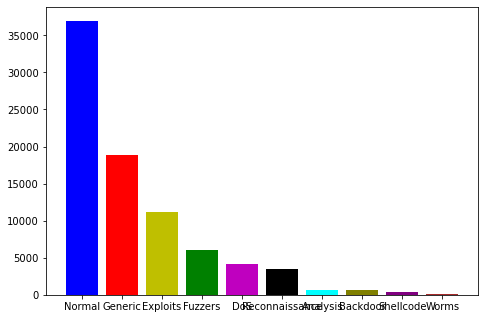

In [14]:
label_data=data['attack_cat']

x_bar=label_data.value_counts()
print(x_bar)
atta_type=list(x_bar.keys())
val_s=list(x_bar.values)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(atta_type[0],val_s[0],color='b')
ax.bar(atta_type[1],val_s[1],color='r')
ax.bar(atta_type[2],val_s[2],color='y')
ax.bar(atta_type[3],val_s[3],color='g')
ax.bar(atta_type[4],val_s[4],color='m')
ax.bar(atta_type[5],val_s[5],color='black')
ax.bar(atta_type[6],val_s[6],color='cyan')
ax.bar(atta_type[7],val_s[7],color='olive')
ax.bar(atta_type[8],val_s[8],color='purple')
ax.bar(atta_type[9],val_s[9],color='brown')

plt.show()

In [16]:
data.to_csv('ddos.csv')
!copy ddos.csv "D:\po"

The system cannot find the drive specified.
